<a href="https://colab.research.google.com/github/aakritigautam/opencv/blob/master/Handwritten_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')



In [4]:
print(mnist.data.shape)


(70000, 784)


In [5]:
from sklearn.model_selection import train_test_split
train_img , test_img , train_lbl ,test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0,random_state=0
)


In [6]:
print(train_img.shape)

(60000, 784)


In [7]:
print(train_lbl.shape)


(60000,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt


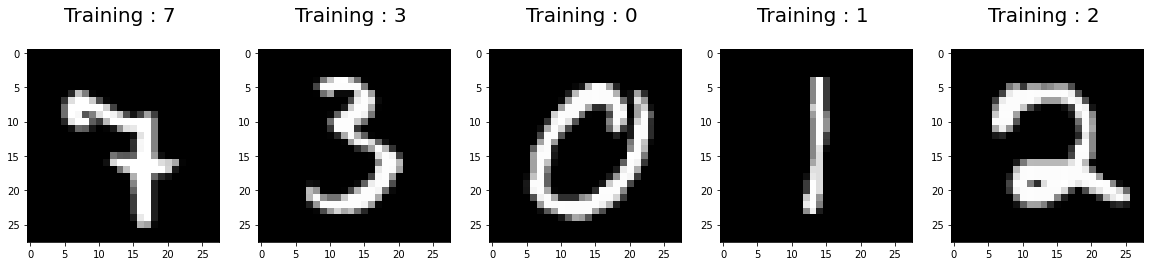

In [9]:
plt.figure(figsize = (20,4))
for index, (images, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1,5, index+1)
  plt.imshow(np.reshape(images, (28, 28)), cmap= plt.cm.gray)
  plt.title('Training : %s \n' %label, fontsize = 20)


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logisticRegr=LogisticRegression(solver='lbfgs')

In [14]:
logisticRegr.fit(train_img,train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [15]:
logisticRegr.predict(test_img[0:5])

array(['0', '4', '1', '2', '4'], dtype=object)

In [17]:
prediction=logisticRegr.predict(test_img)

In [18]:
score=logisticRegr.score(test_img,test_lbl)
print(score)

0.9184


In [19]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, prediction):
    if label != predict:
        misclassifiedIndexes.append(index)
    index += 1

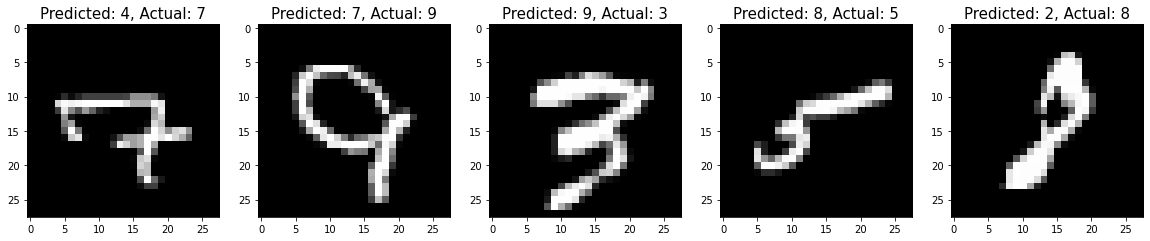

In [20]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction[badIndex], test_lbl[badIndex]), fontsize = 15)

In [21]:
index2 = 0
correctclassifiedIndexes = []
for label, predict in zip(test_lbl, prediction):
    if label != predict:
        correctclassifiedIndexes.append(index2)
    index2 += 1

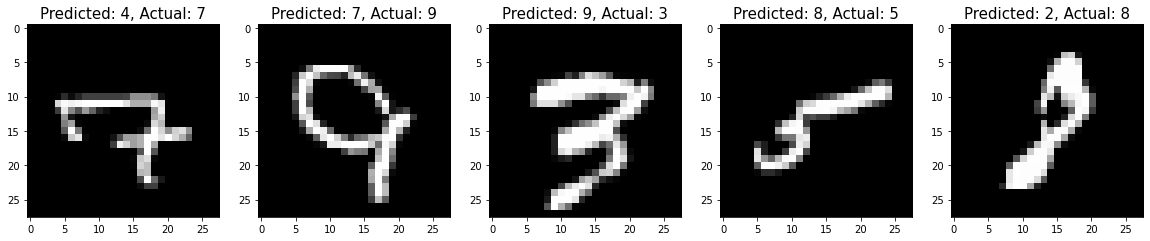

In [22]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(correctclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction[badIndex], test_lbl[badIndex]), fontsize = 15)

In [23]:
import seaborn as sns
from sklearn import metrics

In [24]:
confM=metrics.confusion_matrix(test_lbl,prediction)

In [25]:
print(confM)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


Text(0.5, 1.0, 'Accuracy Score:0.9184')

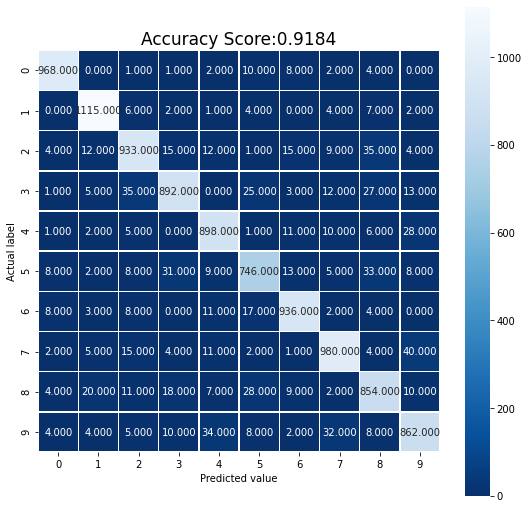

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(confM,annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted value');
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=17)

